In [89]:
import glob
import os 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

UVOT_2020oi = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/UVOT_Reductions/temp_from_younger_cluster/2020oi_Swift_3arcsec.csv")
UVOT_2020oi = UVOT_2020oi[UVOT_2020oi['MJD'] > 58800]

In [90]:
peak_times = {}
peak_times['SN2016coi'] = '2016-06-10T00:00:00'
peak_times['SN2013dk'] = '2013-07-03T00:00:00'
peak_times['SN2013ge'] = '2013-11-28T00:00:00'
peak_times['PTF12gzk'] = '2012-08-11T00:00:00'
from astropy.time import Time

for key in list(peak_times.keys()):
    tempTime = peak_times[key]    
    t = Time(tempTime)
    peak_times[key] = t.jd

In [91]:
df_list = []
path = "/Users/alexgagliano/Documents/Research/2020oi/data/Ic_SwiftTemplate/"
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(path) if isfile(join(path, f))]
for file in files:
    SN = file.split("_")[0]
    if SN in list(peak_times.keys()):
        df = pd.read_csv(path+file, delim_whitespace=True)
        time = df['MJD[days]'].values
        mag = df['Mag'].values
        df['phase'] = df['MJD[days]'] - peak_times[SN]
        df['SN'] = SN
        df_list.append(df)
df_Ics = pd.concat(df_list)

In [92]:
df_UVM2 = df_Ics[df_Ics['Filter'] == 'UVM2']
df_UVW2 = df_Ics[df_Ics['Filter'] == 'UVW2']
df_UVW2.dropna(subset=['Mag'], inplace=True)
df_UVM2.dropna(subset=['Mag'], inplace=True)

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [93]:
peak = 58866.1
UVOT_2020oi['phase'] = UVOT_2020oi['MJD'] - peak

Text(0.5, 1.0, 'SN Ic UVW2 Data')

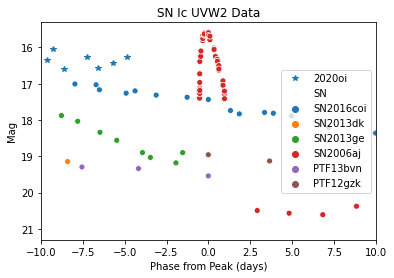

In [94]:
phot20oi_UVM2 = UVOT_2020oi[UVOT_2020oi["FLT"] == 'UVM2']
phot20oi_UVW2 = UVOT_2020oi[UVOT_2020oi["FLT"] == 'UVW2']

plt.plot(phot20oi_UVW2['phase'], phot20oi_UVW2['MAG'], '*', label='2020oi')
sns.scatterplot(x="phase", y="Mag", hue="SN",data=dfUVW2_Ic)
plt.xlim((-10, 10))
plt.gca().invert_yaxis()
plt.xlabel("Phase from Peak (days)")
plt.title("SN Ic UVW2 Data")
#plt.savefig("Ic_comparison.png", dpi=300)

In [134]:
phot2006aj = pd.read_csv("../data/2006aj.csv")

In [135]:
phot2006aj[phot2006aj['band'] == 'V']

,event,time,magnitude,e_magnitude,upperlimit,band,instrument,telescope,source
0,SN2006aj,53784.15060,16.878,NaN,T,V,UVOT,Swift,2014Ap&SS.354...89B
1,SN2006aj,53784.15190,18.926,NaN,T,V,UVOT,Swift,2014Ap&SS.354...89B
4,SN2006aj,53784.15620,17.692,NaN,T,V,UVOT,Swift,2014Ap&SS.354...89B
10,SN2006aj,53784.15810,17.720,NaN,T,V,UVOT,Swift,2014Ap&SS.354...89B
13,SN2006aj,53784.16210,18.616,0.268,F,V,UVOT,Swift,2014Ap&SS.354...89B
...,...,...,...,...,...,...,...,...,...
462,SN2006aj,53816.56710,19.475,0.243,F,V,UVOT,Swift,2014Ap&SS.354...89B
466,SN2006aj,53817.11534,19.361,0.108,F,V,NaN,CfA3_KEP,2014ApJS..213...19B
469,SN2006aj,53818.51640,19.302,0.260,F,V,UVOT,Swift,2014Ap&SS.354...89B
472,SN2006aj,53820.19980,20.126,NaN,T,V,UVOT,Swift,2014Ap&SS.354...89B


In [86]:
data = pd.read_csv("../data/photometry/2020oi_data.snana.txt", delimiter='  ')
data = data[data['MJD'] > 58750]
data = data[data['MAG'] > 0]

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [87]:
np.min(data.loc[data['FLT'] == 'V', 'MJD'])

58869.352

NameError: name 'phot2006aj' is not defined

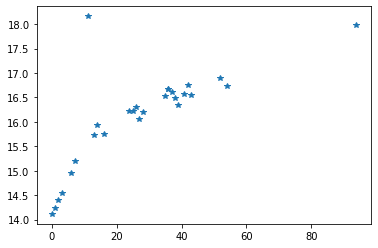

In [88]:
plt.plot(data.loc[data['FLT'] == 'V', 'MJD'] - np.min(data.loc[data['FLT'] == 'V', 'MJD']), data.loc[data['FLT'] == 'V', 'MAG'], '*', label='2020oi')
plt.plot(phot2006aj.loc[phot2006aj['band'] == 'V', 'time'] - np.min(phot2006aj.loc[phot2006aj['band'] == 'V', 'time']), phot2006aj.loc[phot2006aj['band'] == 'V', 'magnitude'], 'o', label='2006aj')
plt.gca().invert_yaxis()
plt.xlim((-10, 60))
plt.title("V-band mag");
plt.xlabel("Time since explosion (days)");
plt.ylabel("Magnitude");
plt.legend(fontsize=16);

In [139]:
phot2006aj.loc[phot2006aj['band'] == 'V', 'instrument']

0      UVOT
1      UVOT
4      UVOT
10     UVOT
13     UVOT
       ... 
462    UVOT
466     NaN
469    UVOT
472    UVOT
473    UVOT
Name: instrument, Length: 98, dtype: object

In [140]:
data.loc[data['FLT'] == 'V', 'TELESCOPE']

286     Swope
290     Swope
295     Swope
301     Swope
306     Swope
312     Swope
316     Swope
321     Swope
330     Swope
337     Swope
342     Swope
348     Swope
353     Swope
358     Swope
368     Swope
376     Swope
377     Swope
382     Swope
387     Swope
392     Swope
401     Swope
408     Swope
413     Swope
416     Swope
419     Swope
450    Nickel
458    Nickel
Name: TELESCOPE, dtype: object

In [141]:
Swift2013ge = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/2013ge_Swift.txt")

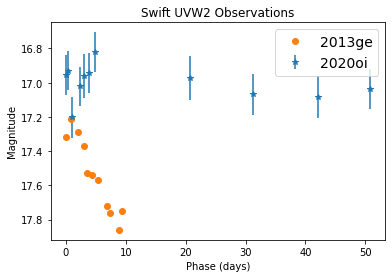

In [142]:
#plt.plot(, , '*', label='2020oi')
plt.errorbar(phot20oi_UVW2['phase'], phot20oi_UVW2['MAG'], yerr=phot20oi_UVW2['MAGERR'], fmt='*', label=r'2020oi')

plt.plot(Swift2013ge['MJD'] - np.min(Swift2013ge['MJD']), Swift2013ge['uvw2'],'o', label='2013ge')
plt.gca().invert_yaxis()
plt.xlabel("Phase (days)")
plt.ylabel("Magnitude")
plt.title("Swift UVW2 Observations")
plt.legend(fontsize=14)

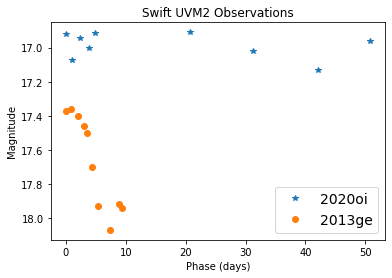

In [143]:
plt.plot(phot20oi_UVM2['phase'], phot20oi_UVM2['MAG'], '*', label='2020oi')
plt.plot(Swift2013ge['MJD'] - np.min(Swift2013ge['MJD']), Swift2013ge['uvm2'],'o', label='2013ge')
plt.gca().invert_yaxis()
plt.xlabel("Phase (days)")
plt.ylabel("Magnitude")
plt.title("Swift UVM2 Observations")
plt.legend(fontsize=14)